# <font color='blue'>Loan Approval Prediction</font>
Author: Mayuri Vijay Wabale

## Abstract 
LOANS are the major requirement of the modern world. By this only, Banks get a major part of the total profit. It is beneficial for students to manage their education and living expenses, and for people to buy any kind of luxury like houses, cars, etc.

But when it comes to deciding whether the applicant’s profile is relevant to be granted with loan or not. Banks have to look after many aspects.

So, here we will be using Machine Learning with Python to ease their work and predict whether the candidate’s profile is relevant or not using key features like Marital Status, Education, Applicant Income, Credit History, etc.

## Problem Statement
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. Customers first apply for a home loan after that company validates the customer’s eligibility for a loan. The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, that are eligible for loan amounts so that they can specifically target these customers.

In [2]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

## Reading Data

In [3]:
train=pd.read_csv("train_ctrUa4K.csv") 
test=pd.read_csv("test_lAUu6dG.csv")

Let’s make a copy of the train and test data so that even if we change anything in these datasets we would not lose the original datasets.

In [4]:
train_original=train.copy() 
test_original=test.copy()

## Understanding the Data
In this section, we will look at the train and test datasets. Firstly, we will check the features present in our data, and then we will look at their data types.

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have 12 independent variables and 1 target variable, i.e. Loan_Status in the training dataset. Let’s look at the columns of the test dataset.

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have similar features in the test dataset as the training dataset except for the Loan_Status. We will predict the Loan_Status using the model built using the train data. Given below is the description for each variable.


In [8]:
from tabulate import tabulate
mydata= [["Loan_ID", "Unique Loan ID"],["Gender","Male/ Female"], ["Married","Applicant married"],["Dependents", "Number of dependents"],["Education","Applicant Education (Graduate/ Under Graduate)"],["Self_Employed","Self employed (Y/N)"],["ApplicantIncome","Applicant income"],["CoapplicantIncome","Coapplicant income"],["LoanAmount","Loan amount in thousands"],["Loan_Amount_Term","Term of loan in months"],["Credit_History","credit history meets guidelines"],["Property_Area","Urban/ Semi Urban/ Rural"],["Loan_Status","(Target) Loan approved (Y/N)"]]
head=["Variable","Description"]
print(tabulate(mydata,headers=head,tablefmt="grid"))

+-------------------+------------------------------------------------+
| Variable          | Description                                    |
+===================+================================================+
| Loan_ID           | Unique Loan ID                                 |
+-------------------+------------------------------------------------+
| Gender            | Male/ Female                                   |
+-------------------+------------------------------------------------+
| Married           | Applicant married                              |
+-------------------+------------------------------------------------+
| Dependents        | Number of dependents                           |
+-------------------+------------------------------------------------+
| Education         | Applicant Education (Graduate/ Under Graduate) |
+-------------------+------------------------------------------------+
| Self_Employed     | Self employed (Y/N)                            |
+-----

In [9]:
# Data type of each variable
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**We can see there are three formats of data types:**

**object:** Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status </br>
**int64:** It represents the integer variables. ApplicantIncome is of this format. </br>
**float64:** It represents the variable that has some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History </br>

Let’s look at the shape of the dataset.

In [10]:
train.shape, test.shape

((614, 13), (367, 12))

**We have 614 rows and 13 columns in the training dataset and 367 rows and 12 columns in the test dataset.**

In [11]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## Univariate Analysis:
In this section, we will do a univariate analysis. It is the easiest form of analyzing data where we analyze each variable individually. For categorical features, we can use frequency tables or bar plots to calculate the number of each category in a particular variable. Probability Density Functions(PDF) can be used to look at the distribution of the numerical variables.

**Target Variable:** </br>
We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution, and bar plot.

The frequency table of a variable will give us the count of each category in that variable.

In [13]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
# Normalize can be set to True to print proportions instead of number
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

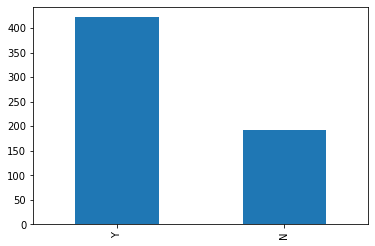

In [15]:
train['Loan_Status'].value_counts().plot.bar()

422(around 69%) people out of 614 got the approval.</br>

Now, let’s visualize each variable separately. Different types of variables are Categorical, ordinal, and numerical.</br>

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)</br>
Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)</br>
Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)</br>
Let’s visualize the categorical and ordinal features first.

### Independent Variable (Categorical)

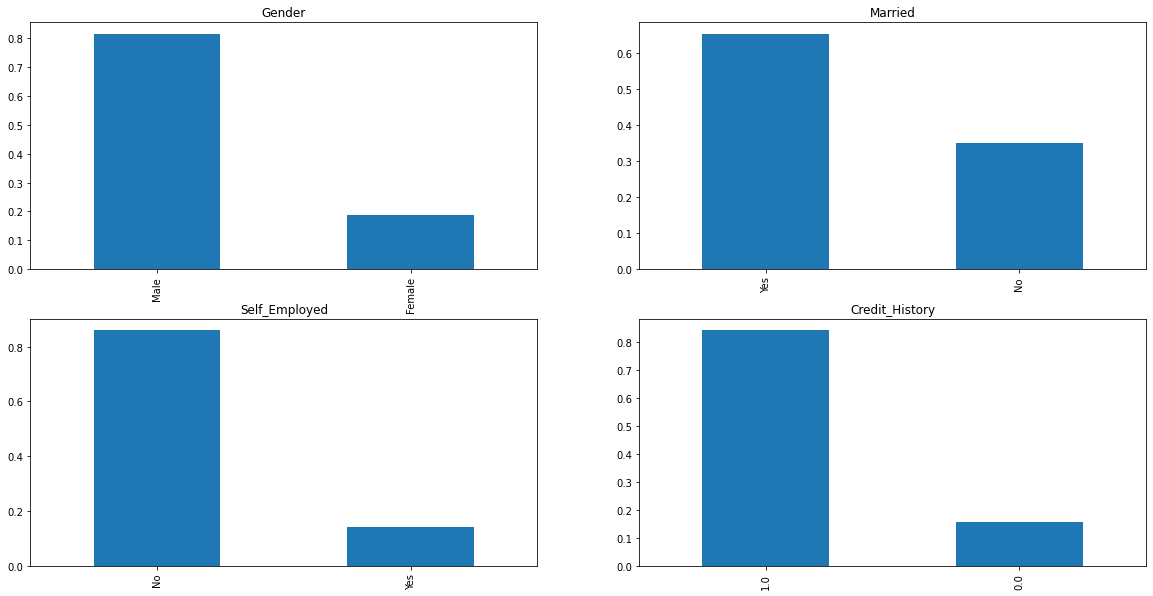

In [16]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

It can be inferred from the above bar plots that:</br>

* 80% of applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* About 15% of applicants in the dataset are self-employed.
* About 85% of applicants have repaid their debts.</br>
Now let’s visualize the ordinal variables.

### Independent Variable (Ordinal)

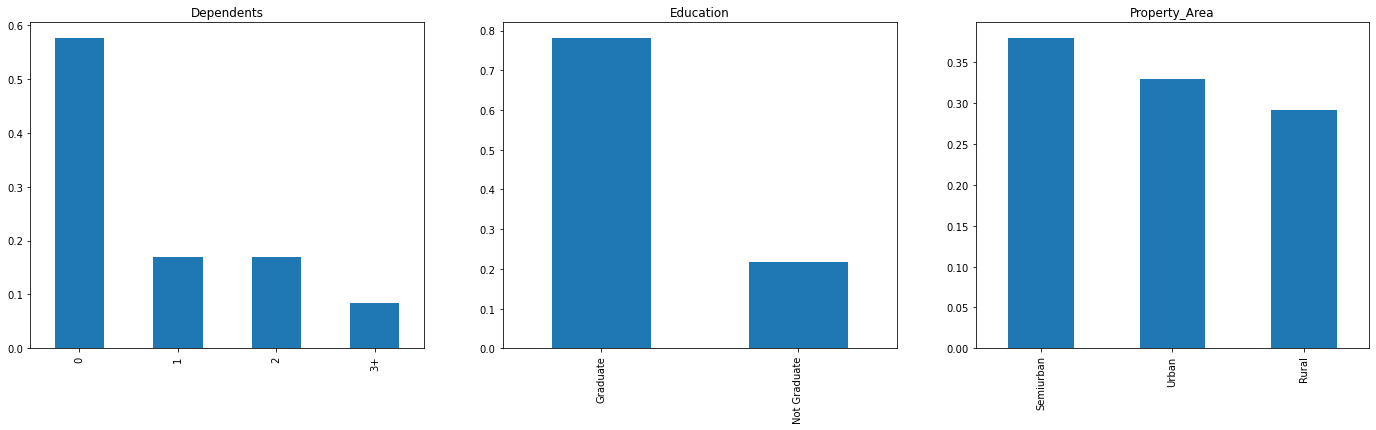

In [17]:
plt.figure(1) 
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents') 
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

Following inferences can be made from the above bar plots:</br>

* Most of the applicants don’t have dependents.
* About 80% of the applicants are graduates.
* Most of the applicants are from semi-urban areas.

### Independent Variable (Numerical)

Till now we have seen the categorical and ordinal variables and now let’s visualize the numerical variables. Let’s look at the distribution of Applicant income first.

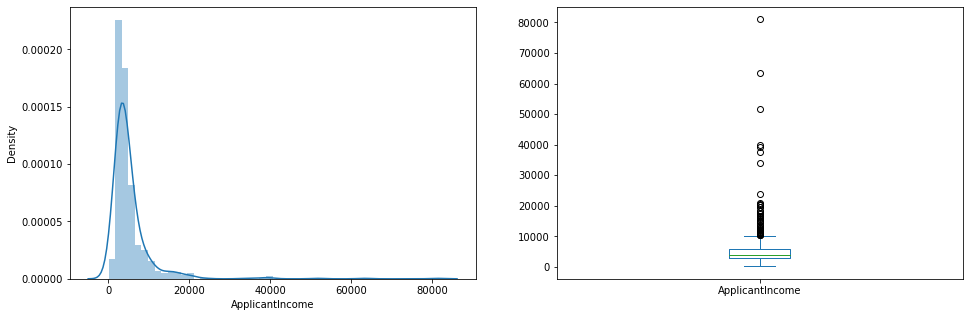

In [18]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

It can be inferred that most of the data in the distribution of applicant income are towards the left which means it is not normally distributed. We will try to make it normal in later sections as algorithms work better if the data is normally distributed.</br>

Let’s look at the distribution of the LoanAmount variable.

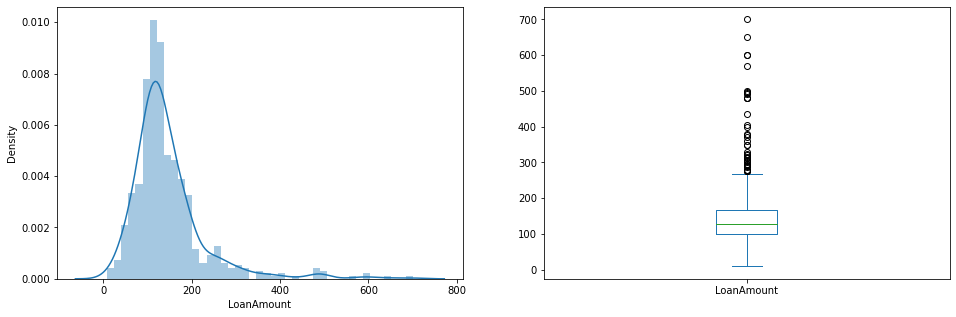

In [19]:
plt.figure(1) 
plt.subplot(121)
df=train.dropna() 
sns.distplot(train['LoanAmount']); 
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.</br>

Now we would like to know how well each feature correlates with Loan Status. So, in the next section, we will look at the bivariate analysis.</br>

## Bivariate Analysis
Some hypothesis:</br>

Applicants with high incomes should have more chances of loan approval.</br>
Applicants who have repaid their previous debts should have higher chances of loan approval.</br>
Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.</br>
Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.</br>
Let’s try to test the above-mentioned hypotheses using bivariate analysis</br>

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.</br>

**Categorical Independent Variable vs Target Variable** </br>

First of all, we will find the relation between the target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


<AxesSubplot:xlabel='Gender'>

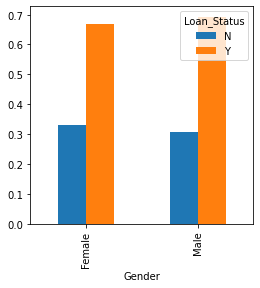

In [20]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
print(Gender)
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.</br>
Now let us visualize the remaining categorical variables vs the target variables.

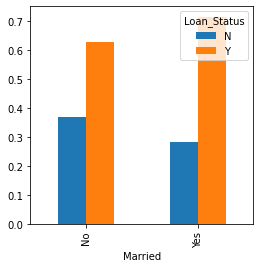

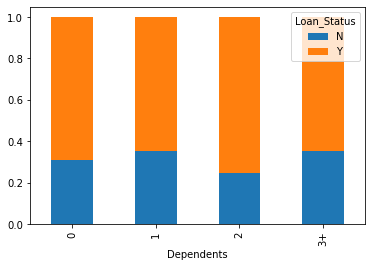

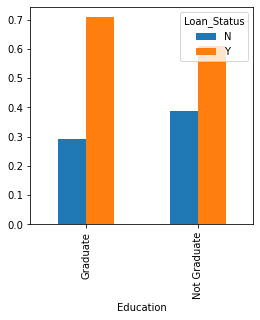

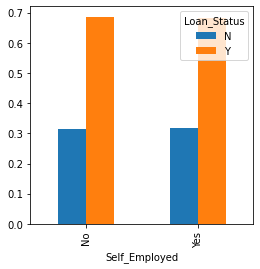

In [21]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.show()

* The proportion of married applicants is higher for the approved loans.
* The distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
* There is nothing significant we can infer from Self_Employed vs Loan_Status plot.</br>
Now we will look at the relationship between the remaining categorical independent variables and Loan_Status.

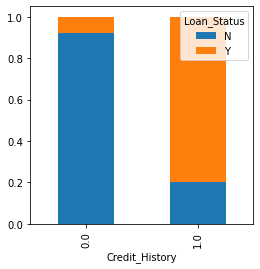

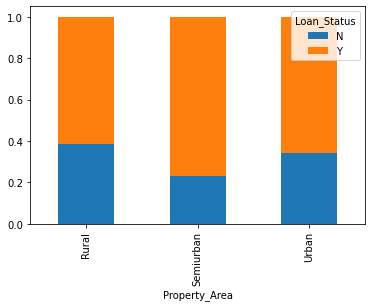

In [22]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

* It seems people with a credit history of 1 are more likely to get their loans approved.
* The proportion of loans getting approved in semi-urban areas is higher as compared to that in rural or urban areas.</br>
Now let’s visualize numerical independent variables with respect to the target variable.

**Numerical Independent Variable vs Target Variable**

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

<AxesSubplot:xlabel='Loan_Status'>

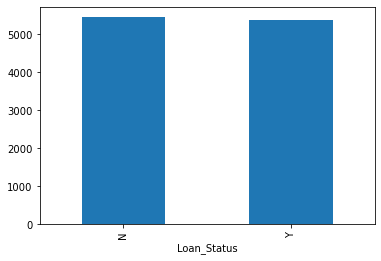

In [23]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [24]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

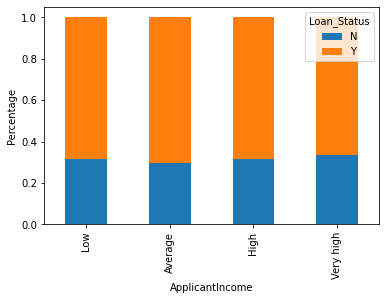

In [25]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

It can be inferred that Applicant’s income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant’s income is high the chances of loan approval will also be high.</br>

We will analyze the applicant’s income and loan amount variable in a similar manner.

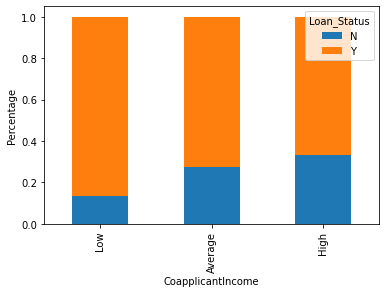

In [26]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

It shows that if co-applicants income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and co applicants’ income to visualize the combined effect of income on loan approval.</br>

Let us combine the Applicant Income and Co-applicant Income and see the combined effect of Total Income on the Loan_Status.

In [27]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [28]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

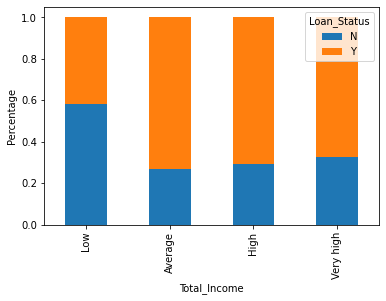

In [29]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High, and Very High Income.</br>

Let’s visualize the Loan amount variable.

In [30]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

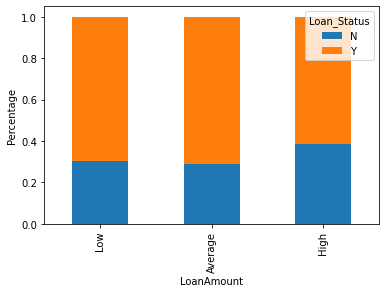

In [31]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amounts as compared to that of High Loan Amounts which supports our hypothesis which considered that the chances of loan approval will be high when the loan amount is less.

In [32]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin',
 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [33]:
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

Now let’s look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker colors mean their correlation is more.

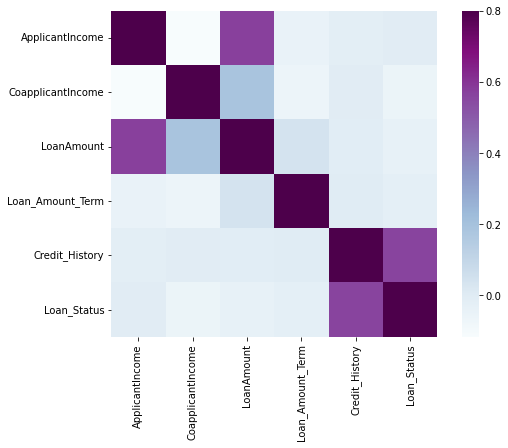

In [34]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

We see that the most correlated variables are (ApplicantIncome – LoanAmount) and (Credit_History – Loan_Status). LoanAmount is also correlated with CoapplicantIncome.</br>

## Missing Value and Outlier Treatment
After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can adversely affect the model performance.</br>

**Missing Value Imputation**

Let’s list out the feature-wise count of missing values.

In [35]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.</br>

We will treat the missing values in all the features one by one.</br>

We can consider these methods to fill the missing values:</br>
* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode </br>
There are very less missing values in Gender, Married, Dependents, Credit_History, and Self_Employed features so we can fill them using the mode of the features.

In [36]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [37]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in the loan amount term variable, the value of 360 is repeated the most. So we will replace the missing values in this variable using the mode of this variable.

In [38]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use the mean or median to impute the missing values. We will use the median to fill the null values as earlier we saw that “loan amount” have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [39]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Now let’s check whether all the missing values are filled in the dataset.

In [40]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the test dataset. Let’s fill all the missing values in the test dataset too with the same approach.

In [41]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

## Outlier Treatment

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Let’s examine what can happen to a data set with outliers. For the sample data set: </br>

1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4  </br>

We find the following: mean, median, mode, and standard deviation </br>

Mean = 2.58 </br>

Median = 2.5 </br>

Mode = 2 </br>

Standard Deviation = 1.08 </br>

If we add an outlier to the data set:</br>

1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 400</br>

The new values of our statistics are:</br>

Mean = 35.38 </br>

Median = 2.5 </br>

Mode = 2 </br>

Standard Deviation = 114.74 </br>

It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.</br>

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much but reduces the larger values. So, we get a distribution similar to the normal distribution.</br>

Let’s visualize the effect of log transformation. We will do similar changes to the test data simultaneously.

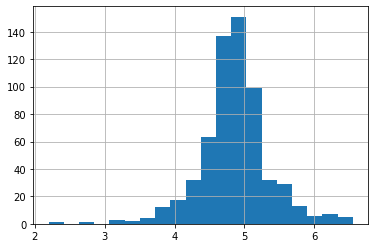

In [42]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [43]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [44]:
train1=train.copy()
test1=test.copy()

## Feature Engineering

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:</br>

Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.</br>

EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.</br>

Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.</br>

In [45]:
train1["TotalIncome"]=train1["ApplicantIncome"]+train1["CoapplicantIncome"]


In [46]:
test1["TotalIncome"]=test1["ApplicantIncome"]+test1["CoapplicantIncome"]

<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

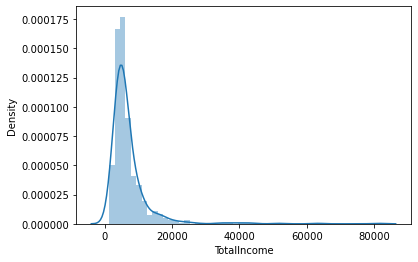

In [47]:
sns.distplot(train1["TotalIncome"])

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

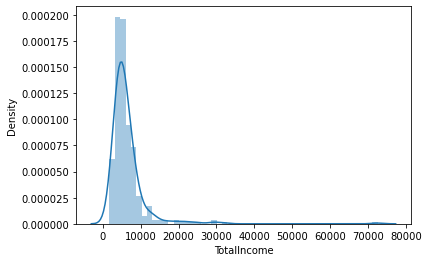

In [48]:
sns.distplot(test1["TotalIncome"])

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Now create the EMI feature

In [49]:
train1["EMI"]=train1["LoanAmount"]/train1["Loan_Amount_Term"]
test1["EMI"]=test1["LoanAmount"]/test1["Loan_Amount_Term"]

In [50]:
train1[["EMI"]].head()

,EMI
0,0.355556
1,0.355556
2,0.183333
3,0.333333
4,0.391667


In [51]:
test1[["EMI"]].head()

,EMI
0,0.305556
1,0.350000
2,0.577778
3,0.277778
4,0.216667


<AxesSubplot:xlabel='EMI', ylabel='Density'>

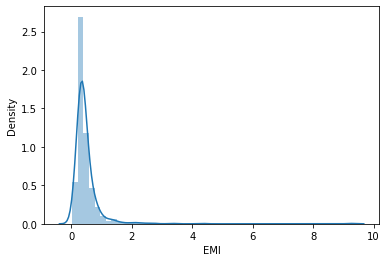

In [52]:
sns.distplot(train1["EMI"])

<AxesSubplot:xlabel='EMI', ylabel='Density'>

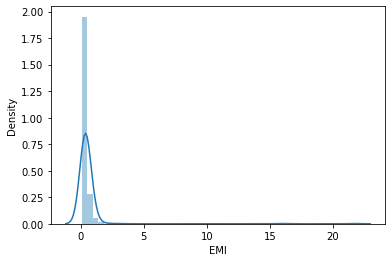

In [53]:
sns.distplot(test1["EMI"])

Let's create Balance Income feature now and check its distribution.

In [54]:
train1["Balance_Income"] = train1["TotalIncome"]-train1["EMI"]*1000 # To make the units equal we multiply with 1000
test1["Balance_Income"] = test1["TotalIncome"]-test1["EMI"]

Have a look of train dataset "Balance Income"

In [55]:
train1[["Balance_Income"]].head()

,Balance_Income
0,5493.444444
1,5735.444444
2,2816.666667
3,4607.666667
4,5608.333333


In [56]:
test1[["Balance_Income"]].head()

,Balance_Income
0,5719.694444
1,4575.650000
2,6799.422222
3,4885.722222
4,3275.783333


Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [57]:
train_new=train1.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","TotalIncome"],axis=1)

In [58]:
train_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,EMI,Balance_Income
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,0.391667,5608.333333


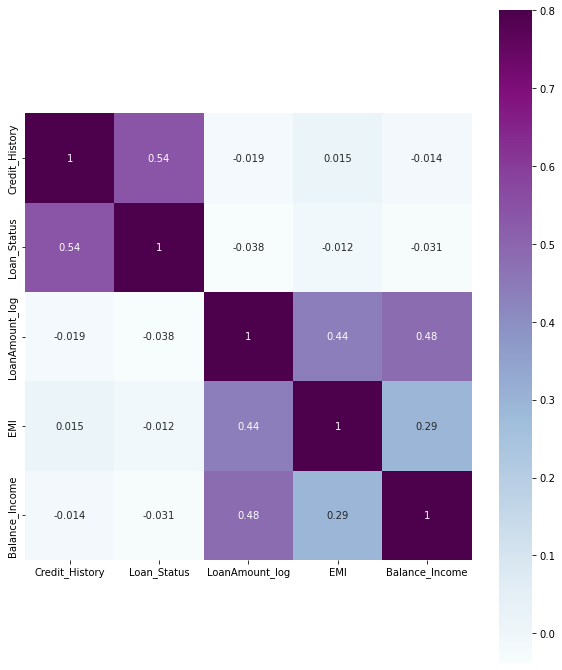

In [59]:
matrix = train_new.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

In [60]:
test_new= test1.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","TotalIncome"],axis=1)

In [61]:
test_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,EMI,Balance_Income
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban,4.700480,0.305556,5719.694444
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban,4.836282,0.350000,4575.650000
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban,5.337538,0.577778,6799.422222
3,LP001035,Male,Yes,2,Graduate,No,1.0,Urban,4.605170,0.277778,4885.722222
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban,4.356709,0.216667,3275.783333


In [62]:
train_new.shape

(614, 12)

In [63]:
test_new.shape

(367, 11)

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

Let us make our first model predict the target variable. We will start with Logistic Regression which is used for predicting binary outcomes.

Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.

Logistic regression is an estimation of the Logit function. The logit function is simply a log of odds in favor of the event. This function creates an S-shaped curve with the probability estimate, which is very similar to the required stepwise function Let’s drop the Loan_ID variable as it does not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [64]:
train_new=train_new.drop("Loan_ID",axis=1)
test_new=test_new.drop("Loan_ID",axis=1)

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the training dataset and save it in another dataset.

In [65]:
X1=train_new.drop("Loan_Status",1)

In [66]:
X1.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,4.85203,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,4.85203,0.355556,5735.444444


In [67]:
y1=train_new[["Loan_Status"]]

In [68]:
y1.head(2)

,Loan_Status
0,1
1,0


Now we will make dummy variables for the categorical variables. A dummy variable turns categorical variables into a series of 0 and 1, making them a lot easier to quantify and compare. Let us understand the process of dummies first:

Consider the “Gender” variable. It has two classes, Male and Female.
As logistic regression takes only the numerical values as input, we have to change male and female into a numerical value.
Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for e ach class, i.e. Male and Female.
Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [69]:
X1 = pd.get_dummies(X1)

In [70]:
X1.head() 

,Credit_History,LoanAmount_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.852030,0.355556,5493.444444,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,1.0,4.852030,0.355556,5735.444444,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,1.0,4.189655,0.183333,2816.666667,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,1.0,4.787492,0.333333,4607.666667,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,1.0,4.948760,0.391667,5608.333333,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1


In [71]:
X1= X1.drop(["Gender_Female","Married_No","Dependents_3","Education_Graduate","Self_Employed_No","Property_Area_Rural"],axis=1)

In [72]:
train_new=pd.get_dummies(train_new)
test_new=pd.get_dummies(test_new)

In [73]:
train_new= train_new.drop(["Gender_Female","Married_No","Dependents_3","Education_Graduate","Self_Employed_No","Property_Area_Rural"],axis=1)

In [74]:
test_new= test_new.drop(["Gender_Female","Married_No","Dependents_3","Education_Graduate","Self_Employed_No","Property_Area_Rural"],axis=1)

In [75]:
train_new.shape

(614, 14)

In [76]:
test_new.shape

(367, 13)

Now we will train the model on the training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is can divide our train dataset into two parts: train and validation. We can train the model on this training part and using that make predictions for the validation part. In this way, we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

We will use the train_test_split function from sklearn to divide our train dataset. So first, let us import train_test_split.

In [91]:
#y = data.Outcome.values
x_data = X1.copy()
x_data.head()


,Credit_History,LoanAmount_log,EMI,Balance_Income,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.852030,0.355556,5493.444444,1,0,1,0,0,0,0,0,1
1,1.0,4.852030,0.355556,5735.444444,1,1,0,1,0,0,0,0,0
2,1.0,4.189655,0.183333,2816.666667,1,1,1,0,0,0,1,0,1
3,1.0,4.787492,0.333333,4607.666667,1,1,1,0,0,1,0,0,1
4,1.0,4.948760,0.391667,5608.333333,1,0,1,0,0,0,0,0,1


                    feature        VIF
0            Credit_History   6.700966
1            LoanAmount_log  28.994941
2                       EMI   2.195306
3            Balance_Income   2.670568
4               Gender_Male   6.473496
5               Married_Yes   3.776880
6              Dependents_0   7.862229
7              Dependents_1   2.943961
8              Dependents_2   2.936159
9    Education_Not Graduate   1.311470
10        Self_Employed_Yes   1.186144
11  Property_Area_Semiurban   2.295549
12      Property_Area_Urban   2.097926


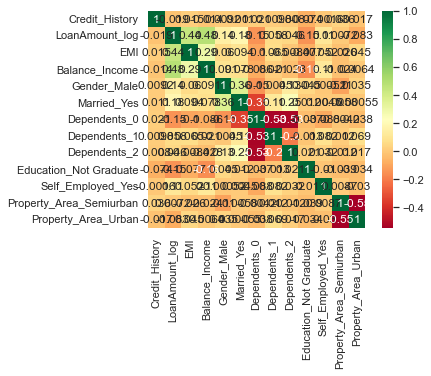

In [92]:

import seaborn as sns
sns.set(context="notebook",palette="Spectral",style="darkgrid",font_scale=1,color_codes=True)
p=sns.heatmap(x_data.corr(), annot=True,cmap='RdYlGn',square=True) 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=x_data
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)

                          for i in range(len(X.columns))]
  
print(vif_data)
     

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train1,x_cv1,y_train1,y_cv1=train_test_split(X1,y1,test_size=0.2,random_state=1)

The dataset has been divided into training and validation parts. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [82]:
logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(x_train1,y_train1)

LogisticRegression(random_state=1)

Let’s predict the Loan_Status for the validation set and calculate its accuracy.

In [83]:
pred_cv_logistic=logistic_model.predict(x_cv1)

Let us calculate how accurate our predictions are by calculating the accuracy

In [84]:
score_logistic =accuracy_score(pred_cv_logistic,y_cv1)*100 
score_logistic

80.48780487804879

So our predictions are almost 81% accurate, i.e. we have identified 80% of the loan status correctly.



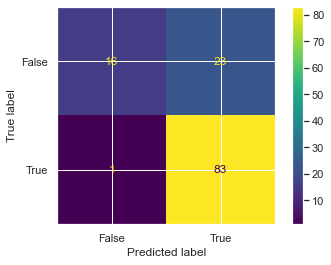

In [85]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_cv1
predicted = pred_cv_logistic

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [86]:
Accuracy = metrics.accuracy_score(actual, predicted)
Accuracy

0.8048780487804879

**Precision:**</br>
Of the positives predicted, what percentage is truly positive?</br>

How to Calculate:</br>
True Positive / (True Positive + False Positive)</br>

Precision does not evaluate the correctly predicted negative cases:

In [87]:
Precision = metrics.precision_score(actual, predicted)
Precision

0.7830188679245284

**Sensitivity (Recall):**</br>
Of all the positive cases, what percentage are predicted positive?</br>

Sensitivity (sometimes called Recall) measures how good the model is at predicting positives.</br>

This means it looks at true positives and false negatives (which are positives that have been incorrectly predicted as negative).</br>

How to Calculate</br>
True Positive / (True Positive + False Negative)</br>

Sensitivity is good at understanding how well the model predicts something is positive:

In [88]:
Sensitivity_recall = metrics.recall_score(actual, predicted)
Sensitivity_recall

0.9880952380952381

**Specificity:**</br>
How well the model is at prediciting negative results?</br>

Specificity is similar to sensitivity, but looks at it from the persepctive of negative results.</br>

How to Calculate</br>
True Negative / (True Negative + False Positive)</br>

Since it is just the opposite of Recall, we use the recall_score function, taking the opposite position label:</br>

In [89]:
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
Specificity

0.41025641025641024

**F-score</br>**
F-score is the "harmonic mean" of precision and sensitivity.</br>

It considers both false positive and false negative cases and is good for imbalanced datasets.</br>

How to Calculate</br>
2 * ((Precision * Sensitivity) / (Precision + Sensitivity))</br>

This score does not take into consideration the True Negative values:</br>

In [90]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.8736842105263158